# fMRI PLOTS

In [1]:
# import packages
# -----------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import subprocess
import sys
import json
import platform
import socket
from scipy import stats


In [2]:
# parameters
# -----------------------------------------------------------------------------
behav_data_path = '/export2/DATA/HIS/HIS_server/analysis/behavior_analysis_output/my_databases/txt_data'

In [3]:
# functions
# -----------------------------------------------------------------------------
# get mean value of the cluster using a mask:
def getClusterMeansFMRI(file, mask):
    #print(f'Get mean value of a cluster:\n--- contrast {contrast} in: {map_type} | {region} | group: {group} ---\n')
    print(f'fslstats -t {file} -k {mask} -M')    
    avgs=os.popen(f'fslstats -t {file} -k {mask} -M').read()
    return [float(i) for i in avgs.split(' \n')[:-1]]

In [ ]:
# Create the habit index csv files used for plotting (by running a dedicated matlab folder)
!matlab -nodesktop -nosplash -r "run('/export2/DATA/HIS/HIS_server/codes/create_HABIT_INDEX_table')";

# Also make sure the clustered_subgroups_HIS_May_2022.csv was fromed (created by the codes of the behavioral data analysis)

# Main (putamen)

I ran this in the terminal for each session and each run:

fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/last2_vs_first2/all_last2_vs_first2_ses1_run01 /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-2*/ses-1/models/model002/sub-*_ses-1_task-training_run-01.feat/stats/cope8.nii.gz 

* for the second run I didn't take the data of participant 251 by temporarily change the name with mv to some temp name that won't be catched by the ls I used and then change it back.


and similarly for the 1-day group's two sessions:

fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/last2_vs_first2/all_1day_last2_vs_first2_ses1_run01 /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-1*/ses-1/models/model002/sub-*_ses-1_task-training_run-01.feat/stats/cope8.nii.gz 



In [126]:
# get average contrast values (following lats two < first two in the putamen):

#create empty df:
df_task_vs_rest_putamen_copes = pd.DataFrame(columns=['ses', 'run', 'first2_gt_last2_putamen_cope'])

for ses in range(1,4):
    for run in range(1,5):
        task_vs_rest_putamen_copes = getClusterMeansFMRI(f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/last2_vs_first2/all_last2_vs_first2_ses{ses}_run0{run}.nii.gz',
        '/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/last2_vs_first2_runs/last2_vs_first2_runs-onsets_analysis-putamen.gfeat/cope3.feat/cluster_mask_zstat2.nii.gz')
        tempDF = pd.DataFrame([['Extensive' for i in range(len(task_vs_rest_putamen_copes))], [ses for i in range(len(task_vs_rest_putamen_copes))],[run for i in range(len(task_vs_rest_putamen_copes))],task_vs_rest_putamen_copes]).T
        tempDF.columns = ['group','ses', 'run', 'first2_gt_last2_putamen_cope']
        #concatenate df:
        df_task_vs_rest_putamen_copes = pd.concat([df_task_vs_rest_putamen_copes, tempDF])

#now for the short training
for ses in range(1,2):
    for run in range(1,3):
        task_vs_rest_putamen_copes = getClusterMeansFMRI(f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/last2_vs_first2/all_1day_last2_vs_first2_ses{ses}_run0{run}.nii.gz',
        '/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/last2_vs_first2_runs/last2_vs_first2_runs-onsets_analysis-putamen.gfeat/cope3.feat/cluster_mask_zstat2.nii.gz')
        tempDF = pd.DataFrame([['Short' for i in range(len(task_vs_rest_putamen_copes))], [ses for i in range(len(task_vs_rest_putamen_copes))],[run for i in range(len(task_vs_rest_putamen_copes))],task_vs_rest_putamen_copes]).T
        tempDF.columns = ['group','ses', 'run', 'first2_gt_last2_putamen_cope']
        #concatenate df:
        df_task_vs_rest_putamen_copes = pd.concat([df_task_vs_rest_putamen_copes, tempDF])

df_task_vs_rest_putamen_copes['abs_run'] = 4*(df_task_vs_rest_putamen_copes.ses - 1) + df_task_vs_rest_putamen_copes.run

fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/last2_vs_first2/all_last2_vs_first2_ses1_run01.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/last2_vs_first2_runs/last2_vs_first2_runs-onsets_analysis-putamen.gfeat/cope3.feat/cluster_mask_zstat2.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/last2_vs_first2/all_last2_vs_first2_ses1_run02.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/last2_vs_first2_runs/last2_vs_first2_runs-onsets_analysis-putamen.gfeat/cope3.feat/cluster_mask_zstat2.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/last2_vs_first2/all_last2_vs_first2_ses1_run03.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/last2_vs_first2_runs/last2_vs_first2_runs-onsets_analysis-putamen.gfeat/cope3.feat/cluster_mask_zstat2.nii.gz -

Text(0.795, 0.05, 'Day 3')

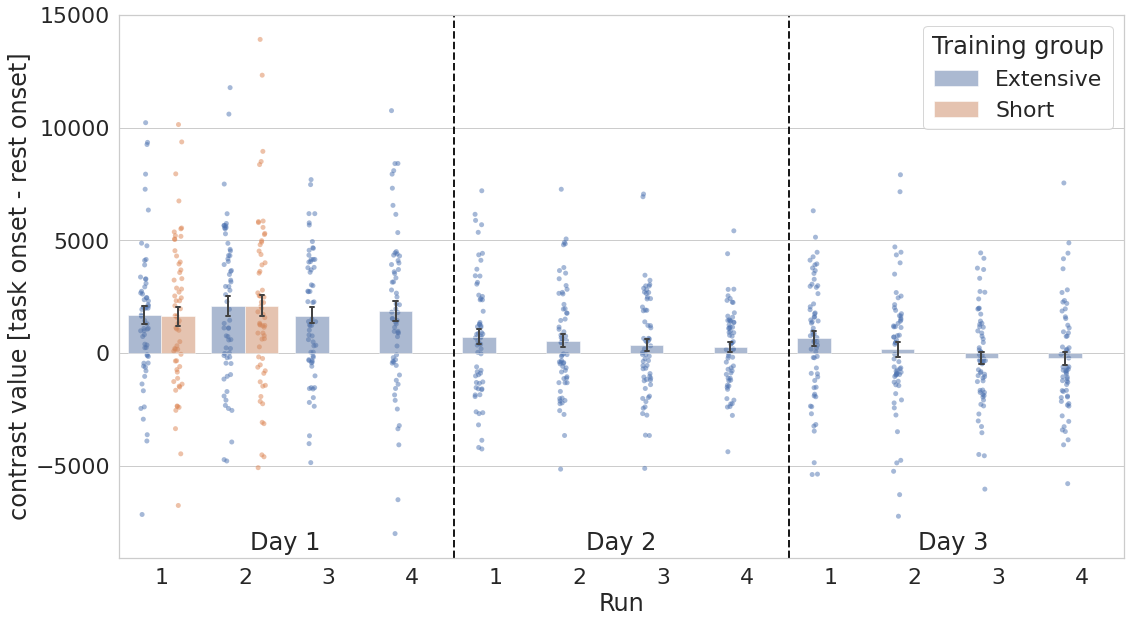

In [191]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(18,10))
sns.stripplot(x="abs_run", y="first2_gt_last2_putamen_cope", hue='group', data=df_task_vs_rest_putamen_copes, ax=axs, zorder=2, alpha= 0.5,dodge=True, label='_Hidden')
sns.barplot(x="abs_run", y="first2_gt_last2_putamen_cope", hue='group', data=df_task_vs_rest_putamen_copes, ci=68, ax=axs,alpha=0.5, zorder=2, capsize=0.05, errwidth=2)
#sns.boxplot(x="abs_run", y="first2_gt_last2_putamen_cope", data=df_task_vs_rest_putamen_copes, ax=axs, zorder=2)
axs.set(xlabel='Run', ylabel='contrast value [task onset - rest onset]')
axs.set_xticklabels(['1', '2', '3', '4'] * 3)
axs.axvline(x=3.5, linewidth=2, color='k', zorder=1, linestyle='--')
axs.axvline(x=7.5, linewidth=2, color='k', zorder=1, linestyle='--')
#axs.xaxis.grid()
h,l = axs.get_legend_handles_labels()
axs.legend(h[2:4],l[2:4], title='Training group', loc='upper right')
axs.text(0.13, 0.05, "Day 1", ha="left", va="top", transform=axs.transAxes)
axs.text(0.465, 0.05, "Day 2", ha="left", va="top", transform=axs.transAxes)
axs.text(0.795, 0.05, "Day 3", ha="left", va="top", transform=axs.transAxes)


***********

# Within-day effects - Head of caudate

In [28]:
# get the subjects that appear in the design file:
subjectsInDesign = []
with open('/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/within_day_effects/within_day_effects-onsets_analysis-caudate_head.gfeat/cope5.feat/design.fsf', 'r') as file:
    for line in file:
        if 'sub-' in line:
            subjectsInDesign.append(int(line.split('sub-')[1][:3]))

len(subjectsInDesign)


62

In [34]:
# Get the behavioral index:
# ----------------------------------
behav_long = pd.read_csv(os.path.join(behav_data_path, 'habitIndex_LONG.csv'))
# remove subjects that don't have DTI data
absent_from_fMRI_data = [sub for sub in behav_long.subID if sub not in subjectsInDesign]
behav_long = behav_long[~behav_long.subID.isin(absent_from_fMRI_data)]
# now make sure that subject lists are matching:
if not [sub for sub in behav_long.subID] == subjectsInDesign:
    raise Exception('Subject lists are not matching')


In [42]:
# getting the contrast values only inside the map... (redundant here, not really needed):
print(f'fslmaths /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/within_day_effects/within_day_effects-onsets_analysis-caudate_head.gfeat/cope5.feat/filtered_func_data.nii.gz \
    -mul {"/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/within_day_effects/within_day_effects-onsets_analysis-caudate_head.gfeat/cope5.feat/cluster_mask_zstat3.nii.gz"} \
     {"/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/within_day_effects/within_day_effects-onsets_analysis-caudate_head.gfeat/cope5.feat/contrast_values_caudate_cope5_zstat3.nii.gz"}')

fslmaths /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/within_day_effects/within_day_effects-onsets_analysis-caudate_head.gfeat/cope5.feat/filtered_func_data.nii.gz     -mul /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/within_day_effects/within_day_effects-onsets_analysis-caudate_head.gfeat/cope5.feat/cluster_mask_zstat3.nii.gz      /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/within_day_effects/within_day_effects-onsets_analysis-caudate_head.gfeat/cope5.feat/contrast_values_caudate_cope5_zstat3.nii.gz


In [192]:
# get average contrast values:
behav_long['avgContrastValues'] = getClusterMeansFMRI('/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/within_day_effects/within_day_effects-onsets_analysis-caudate_head.gfeat/cope5.feat/filtered_func_data.nii.gz',
                                     '/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/within_day_effects/within_day_effects-onsets_analysis-caudate_head.gfeat/cope5.feat/cluster_mask_zstat3.nii.gz')


fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/within_day_effects/within_day_effects-onsets_analysis-caudate_head.gfeat/cope5.feat/filtered_func_data.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/within_day_effects/within_day_effects-onsets_analysis-caudate_head.gfeat/cope5.feat/cluster_mask_zstat3.nii.gz -M


[Text(0, 0.5, 'Habit index'), Text(0.5, 0, 'Contrast value')]

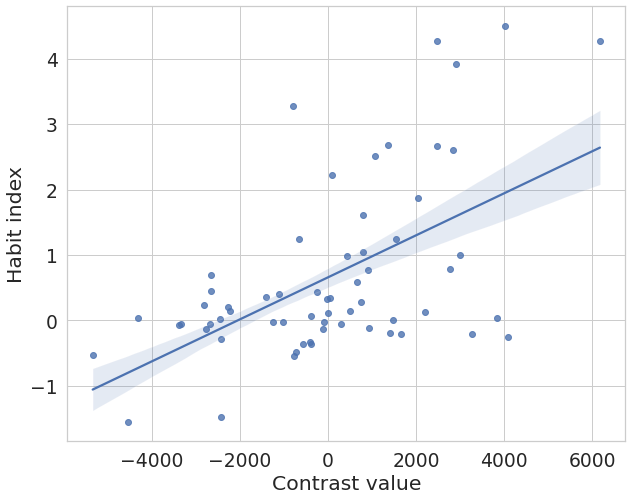

In [194]:
std_for_outliers = 9999999999999
behav_long_no_outiers = behav_long[(behav_long['avgContrastValues'] > (np.mean(behav_long['avgContrastValues']) - std_for_outliers*np.std(behav_long['avgContrastValues']))) & (behav_long['avgContrastValues'] < (np.mean(behav_long['avgContrastValues']) + std_for_outliers*np.std(behav_long['avgContrastValues'])))]

sns.set(font_scale = 1.7)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(10,8))
sns.regplot(x="avgContrastValues", y="habit_index", data=behav_long_no_outiers, ci=68, ax=axs);
axs.set(ylabel='Habit index', xlabel='Contrast value')


**********************

# Valued vs devalued individual differences - across all

In [39]:
# get the subjects that appear in the design file:
subjectsInDesign = []
with open('/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/individual-differences_across-all_extinction_vs_last_run/individual-differences_across-all_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/design.fsf', 'r') as file:
    for line in file:
        if 'sub-' in line:
            subjectsInDesign.append(int(line.split('sub-')[1][:3]))

len(subjectsInDesign)


122

In [40]:
# Get the behavioral index:
# ----------------------------------
behav_all = pd.read_csv(os.path.join(behav_data_path, 'habitIndex_ALL.csv'))
# remove subjects that don't have DTI data
absent_from_fMRI_data = [sub for sub in behav_all.subID if sub not in subjectsInDesign]
behav_all = behav_all[~behav_all.subID.isin(absent_from_fMRI_data)]
# now make sure that subject lists are matching:
if not [sub for sub in behav_all.subID] == subjectsInDesign:
    raise Exception('Subject lists are not matching')


In [41]:
# # getting the contrast values only inside the map... (redundant here, not really needed):
# print(f'fslmaths /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/individual-differences_across-all_extinction_vs_last_run/individual-differences_across-all_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/filtered_func_data.nii.gz \
#     -mul {"/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/individual-differences_across-all_extinction_vs_last_run/individual-differences_across-all_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_zstat4.nii.gz"} \
#      {"/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/individual-differences_across-all_extinction_vs_last_run/individual-differences_across-all_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/contrast_values_intra_calcarine_cope3_zstat4.nii.gz"}')

fslmaths /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/individual-differences_across-all_extinction_vs_last_run/individual-differences_across-all_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/filtered_func_data.nii.gz     -mul /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/individual-differences_across-all_extinction_vs_last_run/individual-differences_across-all_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_zstat4.nii.gz      /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/individual-differences_across-all_extinction_vs_last_run/individual-differences_across-all_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/contrast_values_intra_calcarine_cope3_zstat4.nii.gz


In [42]:
# get average contrast values:
behav_all['avgContrastValues'] = getClusterMeansFMRI('/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/individual-differences_across-all_extinction_vs_last_run/individual-differences_across-all_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/filtered_func_data.nii.gz',
                                     '/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/individual-differences_across-all_extinction_vs_last_run/individual-differences_across-all_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_zstat4.nii.gz')


fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/individual-differences_across-all_extinction_vs_last_run/individual-differences_across-all_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/filtered_func_data.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/individual-differences_across-all_extinction_vs_last_run/individual-differences_across-all_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_zstat4.nii.gz -M


[Text(0, 0.5, 'Habit index'), Text(0.5, 0, 'Contrast value')]

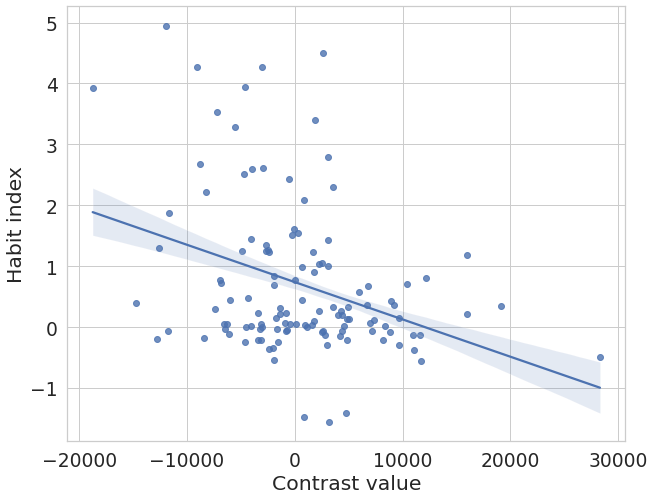

In [43]:
std_for_outliers = 9999999999999
behav_all_no_outiers = behav_all[(behav_all['avgContrastValues'] > (np.mean(behav_all['avgContrastValues']) - std_for_outliers*np.std(behav_all['avgContrastValues']))) & (behav_all['avgContrastValues'] < (np.mean(behav_all['avgContrastValues']) + std_for_outliers*np.std(behav_all['avgContrastValues'])))]

sns.set(font_scale = 1.7)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(10,8))
sns.regplot(x="avgContrastValues", y="habit_index", data=behav_all_no_outiers, ci=68, ax=axs);
axs.set(ylabel='Habit index', xlabel='Contrast value')


**********

# Subgroups - last vs first 2 - Superior parietal lobule

In [5]:
# get the subjects that appear in the design file:
subjectsInDesign = []
with open('/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_last2_vs_first2_runs/equal_var_assumed/SubGroups_last2_vs_first2_runs-onsets_analysis-whole_brain.gfeat/cope3.feat/design.fsf', 'r') as file:
    for line in file:
        if 'sub-' in line:
            subjectsInDesign.append(int(line.split('sub-')[1][:3]))

len(subjectsInDesign)


57

In [8]:
# Get the behavioral index:
# ----------------------------------
clustered_data = pd.read_csv(os.path.join(behav_data_path, 'clustered_subgroups_HIS_May_2022.csv'))
# remove subjects that don't have DTI data
absent_from_fMRI_data = [sub for sub in clustered_data.ID if sub not in subjectsInDesign]
clustered_data = clustered_data[~clustered_data.ID.isin(absent_from_fMRI_data)]
# now make sure that subject lists are matching:
if not [sub for sub in clustered_data.ID] == subjectsInDesign:
    raise Exception('Subject lists are not matching')


In [11]:
# get average contrast values:
clustered_data['avgContrastValues'] = getClusterMeansFMRI('/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_last2_vs_first2_runs/equal_var_assumed/SubGroups_last2_vs_first2_runs-onsets_analysis-whole_brain.gfeat/cope3.feat/filtered_func_data.nii.gz',
                                     '/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_last2_vs_first2_runs/equal_var_assumed/SubGroups_last2_vs_first2_runs-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_zstat1.nii.gz')


fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_last2_vs_first2_runs/equal_var_assumed/SubGroups_last2_vs_first2_runs-onsets_analysis-whole_brain.gfeat/cope3.feat/filtered_func_data.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_last2_vs_first2_runs/equal_var_assumed/SubGroups_last2_vs_first2_runs-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_zstat1.nii.gz -M


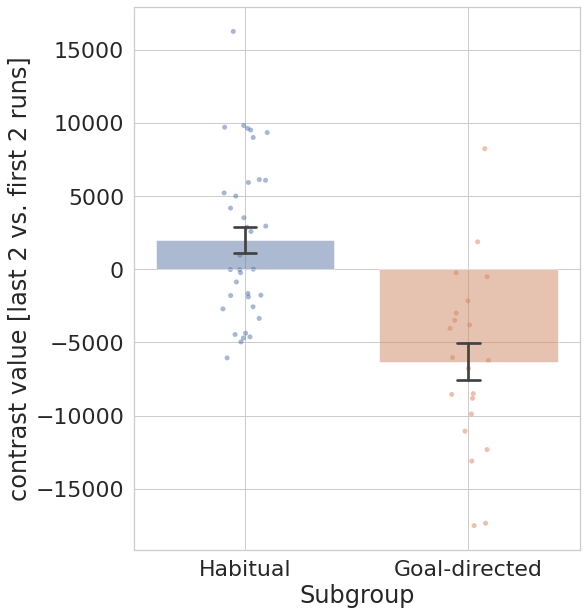

In [16]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(8,10))
sns.stripplot(x="Cluster", y="avgContrastValues", data=clustered_data, ax=axs, zorder=2, alpha= 0.5)
sns.barplot(x="Cluster", y="avgContrastValues", data=clustered_data, ci=68, ax=axs,alpha=0.5, zorder=2, capsize=0.1)
axs.set(xlabel='Subgroup', ylabel='contrast value [last 2 vs. first 2 runs]')
axs.xaxis.grid()



## add each day (builds on the code and files created in the linear trend analysis below)

In [62]:
# get average contrast values:

#create empty df:
df_task_vs_rest_copes = pd.DataFrame(columns=['ses', 'run', 'last2_first2_cope'])

for cluster in ['Habitual', 'Goal-directed']:
    for ses in range(1,4):
        for run in range(1,5):
            task_vs_rest_copes = getClusterMeansFMRI(f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/{cluster}_linear_trend_ses{ses}_run0{run}.nii.gz',
            '/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_last2_vs_first2_runs/equal_var_assumed/SubGroups_last2_vs_first2_runs-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_zstat1.nii.gz')
            tempDF = pd.DataFrame([[cluster for i in range(len(task_vs_rest_copes))], [ses for i in range(len(task_vs_rest_copes))],[run for i in range(len(task_vs_rest_copes))],task_vs_rest_copes]).T
            tempDF.columns = ['subgroup','ses', 'run', 'last2_first2_cope']
            #concatenate df:
            df_task_vs_rest_copes = pd.concat([df_task_vs_rest_copes, tempDF])


df_task_vs_rest_copes['abs_run'] = 4*(df_task_vs_rest_copes.ses - 1) + df_task_vs_rest_copes.run

fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/Habitual_linear_trend_ses1_run01.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_last2_vs_first2_runs/equal_var_assumed/SubGroups_last2_vs_first2_runs-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_zstat1.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/Habitual_linear_trend_ses1_run02.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_last2_vs_first2_runs/equal_var_assumed/SubGroups_last2_vs_first2_runs-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_zstat1.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/Habitual_linear_trend_ses1_run03.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_last2_vs_first2_runs/equal_va

Text(0.795, 0.05, 'Day 3')

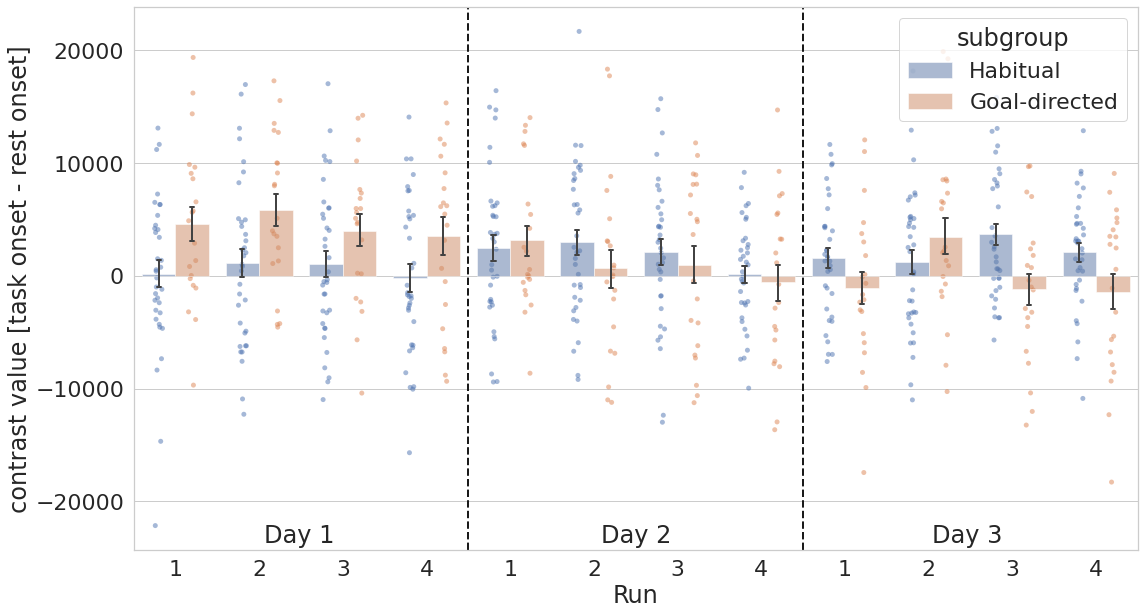

In [63]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(18,10))
sns.stripplot(x="abs_run", y="last2_first2_cope", hue='subgroup', data=df_task_vs_rest_copes, ax=axs, zorder=2, alpha= 0.5,dodge=True, label='_Hidden')
sns.barplot(x="abs_run", y="last2_first2_cope", hue='subgroup', data=df_task_vs_rest_copes, ci=68, ax=axs,alpha=0.5, zorder=2, capsize=0.05, errwidth=2)
#sns.boxplot(x="abs_run", y="last2_first2_cope", data=df_task_vs_rest_copes, ax=axs, zorder=2)
axs.set(xlabel='Run', ylabel='contrast value [task onset - rest onset]')
axs.set_xticklabels(['1', '2', '3', '4'] * 3)
axs.axvline(x=3.5, linewidth=2, color='k', zorder=1, linestyle='--')
axs.axvline(x=7.5, linewidth=2, color='k', zorder=1, linestyle='--')
#axs.xaxis.grid()
h,l = axs.get_legend_handles_labels()
axs.legend(h[2:4],l[2:4], title='subgroup', loc='upper right')
axs.text(0.13, 0.05, "Day 1", ha="left", va="top", transform=axs.transAxes)
axs.text(0.465, 0.05, "Day 2", ha="left", va="top", transform=axs.transAxes)
axs.text(0.795, 0.05, "Day 3", ha="left", va="top", transform=axs.transAxes)


**********

# Subgroups - Linear trend analyses

In [6]:
# get the subjects that appear in the design file:
subjectsInDesign = []
with open('/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_linear_trend_across_3_days/equal_var_assumed/SubGroups_linear_trend_across_3_days-onsets_analysis-whole_brain.gfeat/cope1.feat/design.fsf', 'r') as file:
    for line in file:
        if 'sub-' in line:
            subjectsInDesign.append(int(line.split('sub-')[1][:3]))

len(subjectsInDesign)


56

In [7]:
# Get the behavioral index:
# ----------------------------------
clustered_data = pd.read_csv(os.path.join(behav_data_path, 'clustered_subgroups_HIS_May_2022.csv'))
# remove subjects that don't have DTI data
absent_from_fMRI_data = [sub for sub in clustered_data.ID if sub not in subjectsInDesign]
clustered_data = clustered_data[~clustered_data.ID.isin(absent_from_fMRI_data)]
# now make sure that subject lists are matching:
if not [sub for sub in clustered_data.ID] == subjectsInDesign:
    raise Exception('Subject lists are not matching')


## work on cluster 1 - middle frontal gyrus:

In [122]:
# create specific clusters mask:
cope_path = '/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_linear_trend_across_3_days/equal_var_assumed/SubGroups_linear_trend_across_3_days-onsets_analysis-whole_brain.gfeat/cope1.feat'
all_clusters_mask = os.path.join(cope_path, 'cluster_mask_zstat1.nii.gz')
specific_clusters_mask = os.path.join(cope_path, 'cluster_mask_middle_frontal_gyrus.nii.gz')

os.system(f'fslmaths -dt int \
    {all_clusters_mask} \
    -thr 1 -uthr 1 -bin \
    {specific_clusters_mask}')


0

In [123]:
# get average contrast values:
clustered_data['avgContrastValues'] = getClusterMeansFMRI(f"{os.path.join(cope_path,'filtered_func_data.nii.gz')}",
                                     f'{specific_clusters_mask}')


fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_linear_trend_across_3_days/equal_var_assumed/SubGroups_linear_trend_across_3_days-onsets_analysis-whole_brain.gfeat/cope1.feat/filtered_func_data.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_linear_trend_across_3_days/equal_var_assumed/SubGroups_linear_trend_across_3_days-onsets_analysis-whole_brain.gfeat/cope1.feat/cluster_mask_middle_frontal_gyrus.nii.gz -M


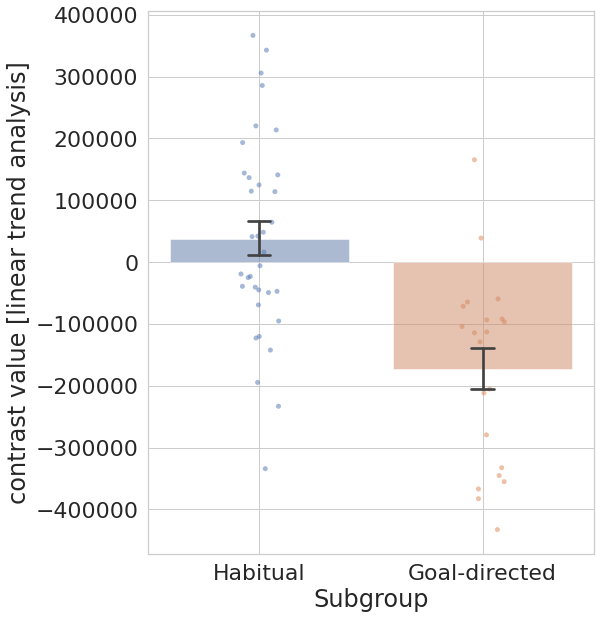

In [124]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(8,10))
sns.stripplot(x="Cluster", y="avgContrastValues", data=clustered_data, ax=axs, zorder=2, alpha= 0.5)
sns.barplot(x="Cluster", y="avgContrastValues", data=clustered_data, ci=68, ax=axs,alpha=0.5, zorder=2, capsize=0.1)
axs.set(xlabel='Subgroup', ylabel='contrast value [linear trend analysis]')
axs.xaxis.grid()



### add each run seperately
based on the way used in main analysis in the putamen above.

In [126]:

# create files for each run for each subgroup of task onset vs. rest onset
for cluster in ['Habitual', 'Goal-directed']:
    for ses in range(1,4):
        for run in range(1,5):
            filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-training_run-0{run}.feat/stats/cope8.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
            os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/{cluster}_linear_trend_ses{ses}_run0{run} {' '.join(filesToMerge)}")



In [127]:
# get average contrast values:

#create empty df:
df_task_vs_rest_copes = pd.DataFrame(columns=['ses', 'run', 'linear_trend_cope'])

for cluster in ['Habitual', 'Goal-directed']:
    for ses in range(1,4):
        for run in range(1,5):
            task_vs_rest_copes = getClusterMeansFMRI(f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/{cluster}_linear_trend_ses{ses}_run0{run}.nii.gz', specific_clusters_mask)
            tempDF = pd.DataFrame([[cluster for i in range(len(task_vs_rest_copes))], [ses for i in range(len(task_vs_rest_copes))],[run for i in range(len(task_vs_rest_copes))],task_vs_rest_copes]).T
            tempDF.columns = ['subgroup','ses', 'run', 'linear_trend_cope']
            #concatenate df:
            df_task_vs_rest_copes = pd.concat([df_task_vs_rest_copes, tempDF])


df_task_vs_rest_copes['abs_run'] = 4*(df_task_vs_rest_copes.ses - 1) + df_task_vs_rest_copes.run

fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/Habitual_linear_trend_ses1_run01.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_linear_trend_across_3_days/equal_var_assumed/SubGroups_linear_trend_across_3_days-onsets_analysis-whole_brain.gfeat/cope1.feat/cluster_mask_middle_frontal_gyrus.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/Habitual_linear_trend_ses1_run02.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_linear_trend_across_3_days/equal_var_assumed/SubGroups_linear_trend_across_3_days-onsets_analysis-whole_brain.gfeat/cope1.feat/cluster_mask_middle_frontal_gyrus.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/Habitual_linear_trend_ses1_run03.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/ons

Text(0.795, 0.05, 'Day 3')

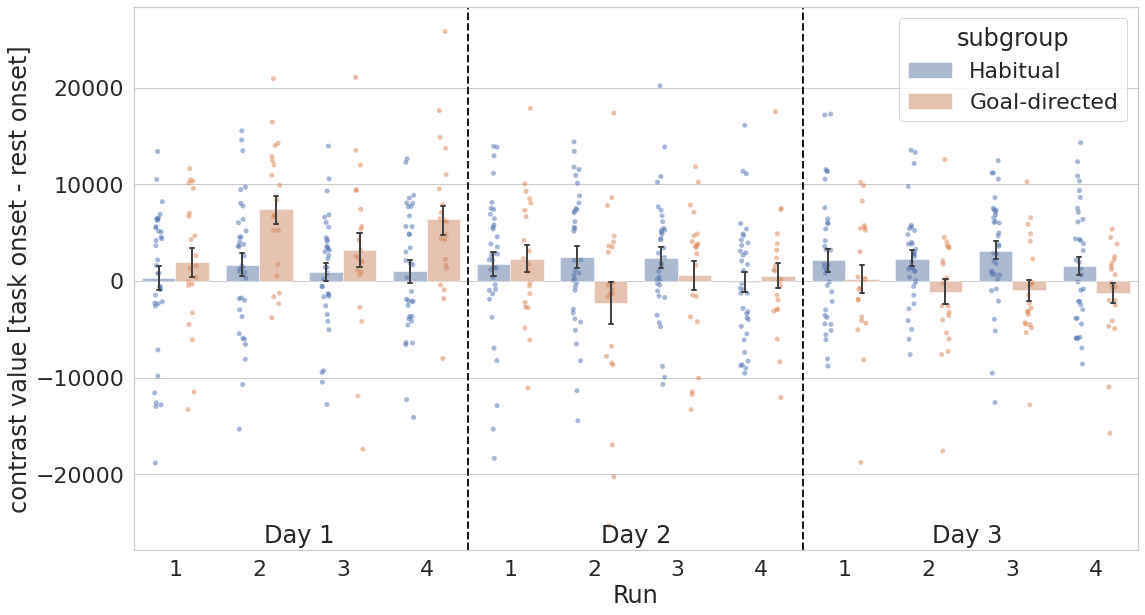

In [128]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(18,10))
sns.stripplot(x="abs_run", y="linear_trend_cope", hue='subgroup', data=df_task_vs_rest_copes, ax=axs, zorder=2, alpha= 0.5,dodge=True, label='_Hidden')
sns.barplot(x="abs_run", y="linear_trend_cope", hue='subgroup', data=df_task_vs_rest_copes, ci=68, ax=axs,alpha=0.5, zorder=2, capsize=0.05, errwidth=2)
#sns.boxplot(x="abs_run", y="linear_trend_cope", data=df_task_vs_rest_copes, ax=axs, zorder=2)
axs.set(xlabel='Run', ylabel='contrast value [task onset - rest onset]')
axs.set_xticklabels(['1', '2', '3', '4'] * 3)
axs.axvline(x=3.5, linewidth=2, color='k', zorder=1, linestyle='--')
axs.axvline(x=7.5, linewidth=2, color='k', zorder=1, linestyle='--')
#axs.xaxis.grid()
h,l = axs.get_legend_handles_labels()
axs.legend(h[2:4],l[2:4], title='subgroup', loc='upper right')
axs.text(0.13, 0.05, "Day 1", ha="left", va="top", transform=axs.transAxes)
axs.text(0.465, 0.05, "Day 2", ha="left", va="top", transform=axs.transAxes)
axs.text(0.795, 0.05, "Day 3", ha="left", va="top", transform=axs.transAxes)


## work on cluster 3-4 - intrapariatal sulcus
At first it seems to me superior parietal lobule (4), angular(3) and supramarginal gyrus (2) together after I checked patterns are pretty similar:

In [9]:
# create specific clusters mask:
cope_path = '/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_linear_trend_across_3_days/equal_var_assumed/SubGroups_linear_trend_across_3_days-onsets_analysis-whole_brain.gfeat/cope1.feat'
all_clusters_mask = os.path.join(cope_path, 'cluster_mask_zstat1.nii.gz')
specific_clusters_mask = os.path.join(cope_path, 'clusters_mask_parietal_lobe.nii.gz')

os.system(f'fslmaths -dt int \
    {all_clusters_mask} \
    -thr 3 -uthr 4 -bin \
    {specific_clusters_mask}')





0

In [10]:
# get average contrast values:
clustered_data['avgContrastValues'] = getClusterMeansFMRI(f"{os.path.join(cope_path,'filtered_func_data.nii.gz')}",
                                     f'{specific_clusters_mask}')


fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_linear_trend_across_3_days/equal_var_assumed/SubGroups_linear_trend_across_3_days-onsets_analysis-whole_brain.gfeat/cope1.feat/filtered_func_data.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_linear_trend_across_3_days/equal_var_assumed/SubGroups_linear_trend_across_3_days-onsets_analysis-whole_brain.gfeat/cope1.feat/clusters_mask_parietal_lobe.nii.gz -M


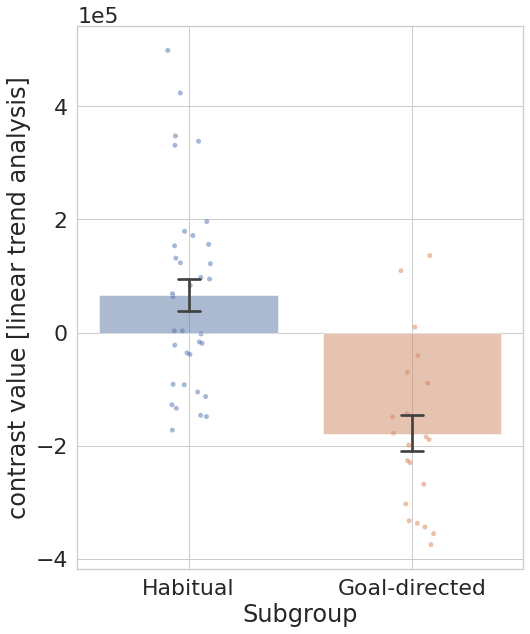

In [16]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(8,10))
sns.stripplot(x="Cluster", y="avgContrastValues", data=clustered_data, ax=axs, zorder=2, alpha= 0.5)
sns.barplot(x="Cluster", y="avgContrastValues", data=clustered_data, ci=68, ax=axs,alpha=0.5, zorder=2, capsize=0.1)
axs.set(xlabel='Subgroup', ylabel='contrast value [linear trend analysis]')
axs.xaxis.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))




### add each run seperately
based on the way used in main analysis in the putamen above.

In [12]:

# create files for each run for each subgroup of task onset vs. rest onset
for cluster in ['Habitual', 'Goal-directed']:
    for ses in range(1,4):
        for run in range(1,5):
            filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-training_run-0{run}.feat/stats/cope8.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
            os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/{cluster}_linear_trend_ses{ses}_run0{run} {' '.join(filesToMerge)}")



In [13]:
# get average contrast values:

#create empty df:
df_task_vs_rest_copes = pd.DataFrame(columns=['ses', 'run', 'linear_trend_cope'])

for cluster in ['Habitual', 'Goal-directed']:
    for ses in range(1,4):
        for run in range(1,5):
            task_vs_rest_copes = getClusterMeansFMRI(f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/{cluster}_linear_trend_ses{ses}_run0{run}.nii.gz', specific_clusters_mask)
            tempDF = pd.DataFrame([[cluster for i in range(len(task_vs_rest_copes))], [ses for i in range(len(task_vs_rest_copes))],[run for i in range(len(task_vs_rest_copes))],task_vs_rest_copes]).T
            tempDF.columns = ['subgroup','ses', 'run', 'linear_trend_cope']
            #concatenate df:
            df_task_vs_rest_copes = pd.concat([df_task_vs_rest_copes, tempDF])


df_task_vs_rest_copes['abs_run'] = 4*(df_task_vs_rest_copes.ses - 1) + df_task_vs_rest_copes.run

fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/Habitual_linear_trend_ses1_run01.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_linear_trend_across_3_days/equal_var_assumed/SubGroups_linear_trend_across_3_days-onsets_analysis-whole_brain.gfeat/cope1.feat/clusters_mask_parietal_lobe.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/Habitual_linear_trend_ses1_run02.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/SubGroups_linear_trend_across_3_days/equal_var_assumed/SubGroups_linear_trend_across_3_days-onsets_analysis-whole_brain.gfeat/cope1.feat/clusters_mask_parietal_lobe.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/Habitual_linear_trend_ses1_run03.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis

Text(0.795, 0.05, 'Day 3')

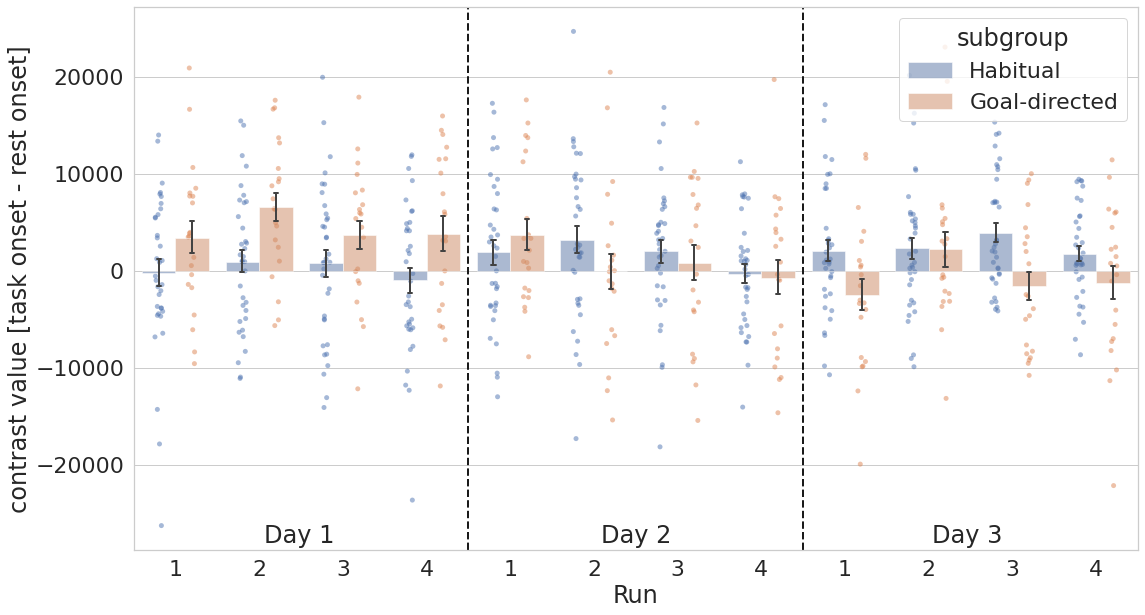

In [14]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(18,10))
sns.stripplot(x="abs_run", y="linear_trend_cope", hue='subgroup', data=df_task_vs_rest_copes, ax=axs, zorder=2, alpha= 0.5,dodge=True, label='_Hidden')
sns.barplot(x="abs_run", y="linear_trend_cope", hue='subgroup', data=df_task_vs_rest_copes, ci=68, ax=axs,alpha=0.5, zorder=2, capsize=0.05, errwidth=2)
#sns.boxplot(x="abs_run", y="linear_trend_cope", data=df_task_vs_rest_copes, ax=axs, zorder=2)
axs.set(xlabel='Run', ylabel='contrast value [task onset - rest onset]')
axs.set_xticklabels(['1', '2', '3', '4'] * 3)
axs.axvline(x=3.5, linewidth=2, color='k', zorder=1, linestyle='--')
axs.axvline(x=7.5, linewidth=2, color='k', zorder=1, linestyle='--')
#axs.xaxis.grid()
h,l = axs.get_legend_handles_labels()
axs.legend(h[2:4],l[2:4], title='subgroup', loc='upper right')
axs.text(0.13, 0.05, "Day 1", ha="left", va="top", transform=axs.transAxes)
axs.text(0.465, 0.05, "Day 2", ha="left", va="top", transform=axs.transAxes)
axs.text(0.795, 0.05, "Day 3", ha="left", va="top", transform=axs.transAxes)


**********

# Subgroups - valued vs. devalued in extinction vs last run - in SHORT training

In [17]:
# get the subjects that appear in the design file:
subjectsInDesign = []
with open('/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/design.fsf', 'r') as file:
    for line in file:
        if 'sub-' in line:
            subjectsInDesign.append(int(line.split('sub-')[1][:3]))

len(subjectsInDesign)


60

In [18]:
# Get the behavioral index:
# ----------------------------------
clustered_data = pd.read_csv(os.path.join(behav_data_path, 'clustered_subgroups_HIS_May_2022.csv'))
# remove subjects that don't have DTI data
absent_from_fMRI_data = [sub for sub in clustered_data.ID if sub not in subjectsInDesign]
clustered_data = clustered_data[~clustered_data.ID.isin(absent_from_fMRI_data)]
# now make sure that subject lists are matching:
if not [sub for sub in clustered_data.ID] == subjectsInDesign:
    raise Exception('Subject lists are not matching')


## work on cluster 1 - post-central gyrus:

In [149]:
# create specific clusters mask:
cope_path = '/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat'
all_clusters_mask = os.path.join(cope_path, 'cluster_mask_zstat2.nii.gz')
specific_clusters_mask = os.path.join(cope_path, 'cluster_mask_post_central_on_border.nii.gz')

os.system(f'fslmaths -dt int \
    {all_clusters_mask} \
    -thr 1 -uthr 1 -bin \
    {specific_clusters_mask}')





0

In [150]:
# get average contrast values:
clustered_data['avgContrastValues'] = getClusterMeansFMRI(f"{os.path.join(cope_path,'filtered_func_data.nii.gz')}",
                                     f'{specific_clusters_mask}')


fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/filtered_func_data.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_post_central_on_border.nii.gz -M


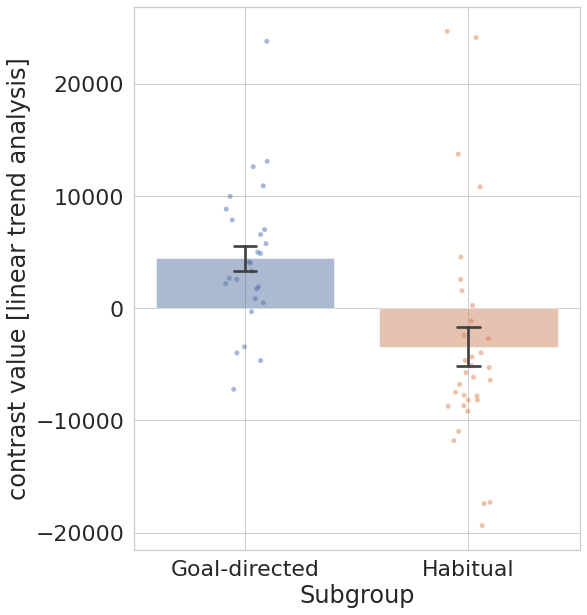

In [151]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(8,10))
sns.stripplot(x="Cluster", y="avgContrastValues", data=clustered_data, ax=axs, zorder=2, alpha= 0.5)
sns.barplot(x="Cluster", y="avgContrastValues", data=clustered_data, ci=68, ax=axs,alpha=0.5, zorder=2, capsize=0.1)
axs.set(xlabel='Subgroup', ylabel='contrast value [linear trend analysis]')
axs.xaxis.grid()



### Now comparing each runseperately:

In [152]:

# create files for each run for each subgroup of task onset vs. rest onset
ses=1
run=2
cluster = 'Habitual'  
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-training_run-0{run}.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_last_run {' '.join(filesToMerge)}")
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-extinction.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_extinction {' '.join(filesToMerge)}")

cluster = 'Goal-directed'
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-training_run-0{run}.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_last_run {' '.join(filesToMerge)}")
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-extinction.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_extinction {' '.join(filesToMerge)}")



0

In [153]:
# get average contrast values:

#create empty df:
df_extinctionvs_last_training_copes = pd.DataFrame(columns=['subgroup', 'time', 'cope_avg'])

for cluster in ['Habitual', 'Goal-directed']:
        extinctionvs_last_training_copes = getClusterMeansFMRI(f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_last_run', specific_clusters_mask)
        tempDF = pd.DataFrame([[cluster for i in range(len(extinctionvs_last_training_copes))], ['last_run' for i in range(len(extinctionvs_last_training_copes))],extinctionvs_last_training_copes]).T
        tempDF.columns = ['subgroup', 'time', 'cope_avg']
        #concatenate df:
        df_extinctionvs_last_training_copes = pd.concat([df_extinctionvs_last_training_copes, tempDF])

        extinctionvs_last_training_copes = getClusterMeansFMRI(f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_extinction', specific_clusters_mask)
        tempDF = pd.DataFrame([[cluster for i in range(len(extinctionvs_last_training_copes))], ['extinction' for i in range(len(extinctionvs_last_training_copes))],extinctionvs_last_training_copes]).T
        tempDF.columns = ['subgroup', 'time', 'cope_avg']
        #concatenate df:
        df_extinctionvs_last_training_copes = pd.concat([df_extinctionvs_last_training_copes, tempDF])


fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_Habitual_extinction_vs_last_training_last_run -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_post_central_on_border.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_Habitual_extinction_vs_last_training_extinction -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_post_central_on_border.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_Goal-directed_extinction_vs_last_training_last_run -k /export2/DATA/HIS/HIS_

[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'contrast value [value onset - devalued onset]')]

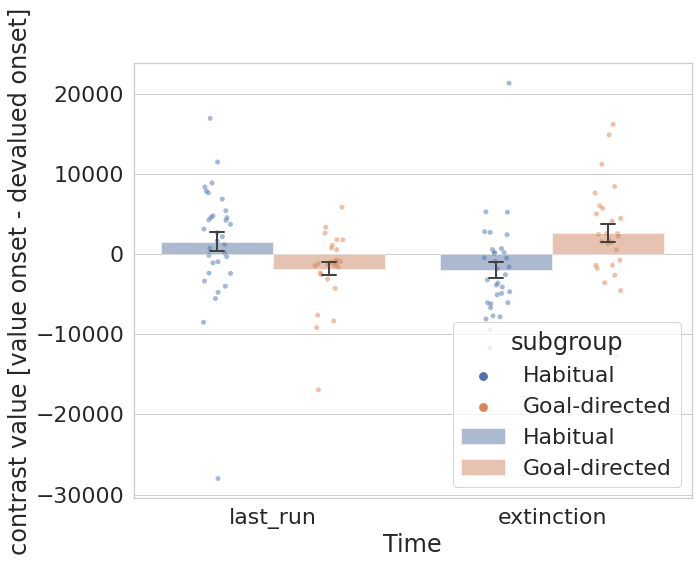

In [154]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(10,8))
sns.stripplot(x="time", y="cope_avg", hue='subgroup', data=df_extinctionvs_last_training_copes, ax=axs, zorder=2, alpha= 0.5,dodge=True, label='_Hidden')
sns.barplot(x="time", y="cope_avg", hue='subgroup', data=df_extinctionvs_last_training_copes, ci=68, ax=axs,alpha=0.5, zorder=2, capsize=0.05, errwidth=2)
#sns.boxplot(x="time", y="cope_avg", data=df_extinctionvs_last_training_copes, ax=axs, zorder=2)
axs.set(xlabel='Time', ylabel='contrast value [value onset - devalued onset]')


## work on cluster 2 - post-central gyrus (on the border with superior parietal lobule):

In [155]:
# create specific clusters mask:
cope_path = '/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat'
all_clusters_mask = os.path.join(cope_path, 'cluster_mask_zstat2.nii.gz')
specific_clusters_mask = os.path.join(cope_path, 'cluster_mask_post_central.nii.gz')

os.system(f'fslmaths -dt int \
    {all_clusters_mask} \
    -thr 2 -uthr 2 -bin \
    {specific_clusters_mask}')





0

In [156]:
# get average contrast values:
clustered_data['avgContrastValues'] = getClusterMeansFMRI(f"{os.path.join(cope_path,'filtered_func_data.nii.gz')}",
                                     f'{specific_clusters_mask}')


fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/filtered_func_data.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_post_central.nii.gz -M


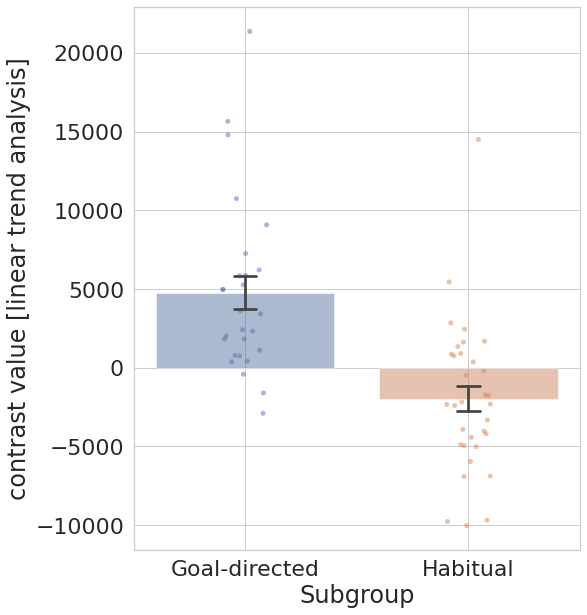

In [157]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(8,10))
sns.stripplot(x="Cluster", y="avgContrastValues", data=clustered_data, ax=axs, zorder=2, alpha= 0.5)
sns.barplot(x="Cluster", y="avgContrastValues", data=clustered_data, ci=68, ax=axs,alpha=0.5, zorder=2, capsize=0.1)
axs.set(xlabel='Subgroup', ylabel='contrast value [linear trend analysis]')
axs.xaxis.grid()



### Now comparing each runseperately:

In [ ]:

# create files for each run for each subgroup of task onset vs. rest onset
ses=1
run=2
cluster = 'Habitual'  
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-training_run-0{run}.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_last_run {' '.join(filesToMerge)}")
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-extinction.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_extinction {' '.join(filesToMerge)}")

cluster = 'Goal-directed'
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-training_run-0{run}.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_last_run {' '.join(filesToMerge)}")
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-extinction.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_extinction {' '.join(filesToMerge)}")



0

In [158]:
# get average contrast values:

#create empty df:
df_extinctionvs_last_training_copes = pd.DataFrame(columns=['subgroup', 'time', 'cope_avg'])

for cluster in ['Habitual', 'Goal-directed']:
        extinctionvs_last_training_copes = getClusterMeansFMRI(f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_last_run', specific_clusters_mask)
        tempDF = pd.DataFrame([[cluster for i in range(len(extinctionvs_last_training_copes))], ['last_run' for i in range(len(extinctionvs_last_training_copes))],extinctionvs_last_training_copes]).T
        tempDF.columns = ['subgroup', 'time', 'cope_avg']
        #concatenate df:
        df_extinctionvs_last_training_copes = pd.concat([df_extinctionvs_last_training_copes, tempDF])

        extinctionvs_last_training_copes = getClusterMeansFMRI(f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_extinction', specific_clusters_mask)
        tempDF = pd.DataFrame([[cluster for i in range(len(extinctionvs_last_training_copes))], ['extinction' for i in range(len(extinctionvs_last_training_copes))],extinctionvs_last_training_copes]).T
        tempDF.columns = ['subgroup', 'time', 'cope_avg']
        #concatenate df:
        df_extinctionvs_last_training_copes = pd.concat([df_extinctionvs_last_training_copes, tempDF])


fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_Habitual_extinction_vs_last_training_last_run -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_post_central.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_Habitual_extinction_vs_last_training_extinction -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_post_central.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_Goal-directed_extinction_vs_last_training_last_run -k /export2/DATA/HIS/HIS_server/analysis/task

[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'contrast value [value onset - devalued onset]')]

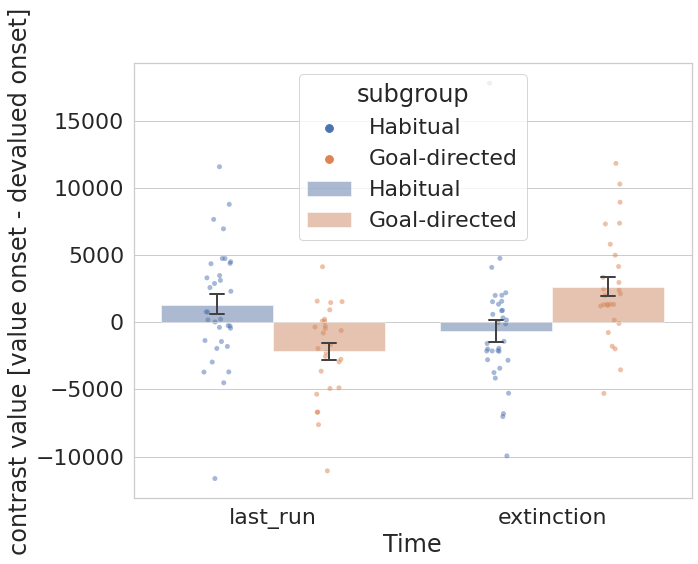

In [159]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(10,8))
sns.stripplot(x="time", y="cope_avg", hue='subgroup', data=df_extinctionvs_last_training_copes, ax=axs, zorder=2, alpha= 0.5,dodge=True, label='_Hidden')
sns.barplot(x="time", y="cope_avg", hue='subgroup', data=df_extinctionvs_last_training_copes, ci=68, ax=axs,alpha=0.5, zorder=2, capsize=0.05, errwidth=2)
#sns.boxplot(x="time", y="cope_avg", data=df_extinctionvs_last_training_copes, ax=axs, zorder=2)
axs.set(xlabel='Time', ylabel='contrast value [value onset - devalued onset]')


## work on cluster 1-2 together - post-central gyrus:

In [26]:
# create specific clusters mask:
cope_path = '/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat'
all_clusters_mask = os.path.join(cope_path, 'cluster_mask_zstat2.nii.gz')
specific_clusters_mask = os.path.join(cope_path, 'cluster_mask_post_central.nii.gz')

os.system(f'fslmaths -dt int \
    {all_clusters_mask} \
    -thr 2 -uthr 3 -bin \
    {specific_clusters_mask}')





0

In [27]:
# get average contrast values:
clustered_data['avgContrastValues'] = getClusterMeansFMRI(f"{os.path.join(cope_path,'filtered_func_data.nii.gz')}",
                                     f'{specific_clusters_mask}')


fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/filtered_func_data.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_post_central.nii.gz -M


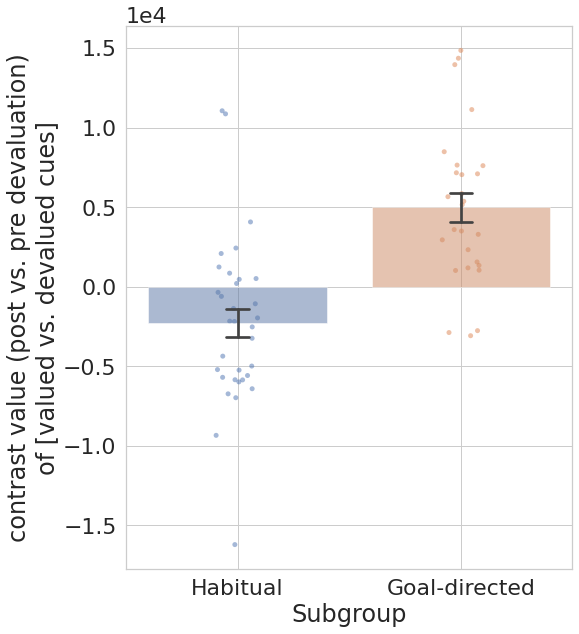

In [38]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(8,10))
sns.stripplot(x="Cluster", y="avgContrastValues", data=clustered_data, ax=axs, zorder=2, alpha= 0.5, order =['Habitual', 'Goal-directed'])
sns.barplot(x="Cluster", y="avgContrastValues", data=clustered_data, ci=68, ax=axs,alpha=0.5, zorder=2, capsize=0.1, order =['Habitual', 'Goal-directed'])
axs.set(xlabel='Subgroup', ylabel='contrast value (post vs. pre devaluation)\nof [valued vs. devalued cues]')
axs.xaxis.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))



### Now comparing each runseperately:

In [31]:

# create files for each run for each subgroup of task onset vs. rest onset
ses=1
run=2
cluster = 'Habitual'  
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-training_run-0{run}.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_last_run {' '.join(filesToMerge)}")
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-extinction.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_extinction {' '.join(filesToMerge)}")

cluster = 'Goal-directed'
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-training_run-0{run}.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_last_run {' '.join(filesToMerge)}")
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-extinction.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_extinction {' '.join(filesToMerge)}")



0

In [32]:
# get average contrast values:

#create empty df:
df_extinctionvs_last_training_copes = pd.DataFrame(columns=['subgroup', 'time', 'cope_avg'])

for cluster in ['Habitual', 'Goal-directed']:
        extinctionvs_last_training_copes = getClusterMeansFMRI(f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_last_run', specific_clusters_mask)
        tempDF = pd.DataFrame([[cluster for i in range(len(extinctionvs_last_training_copes))], ['last_run' for i in range(len(extinctionvs_last_training_copes))],extinctionvs_last_training_copes]).T
        tempDF.columns = ['subgroup', 'time', 'cope_avg']
        #concatenate df:
        df_extinctionvs_last_training_copes = pd.concat([df_extinctionvs_last_training_copes, tempDF])

        extinctionvs_last_training_copes = getClusterMeansFMRI(f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_extinction', specific_clusters_mask)
        tempDF = pd.DataFrame([[cluster for i in range(len(extinctionvs_last_training_copes))], ['extinction' for i in range(len(extinctionvs_last_training_copes))],extinctionvs_last_training_copes]).T
        tempDF.columns = ['subgroup', 'time', 'cope_avg']
        #concatenate df:
        df_extinctionvs_last_training_copes = pd.concat([df_extinctionvs_last_training_copes, tempDF])


fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_Habitual_extinction_vs_last_training_last_run -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_post_central.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_Habitual_extinction_vs_last_training_extinction -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_post_central.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_Goal-directed_extinction_vs_last_training_last_run -k /export2/DATA/HIS/HIS_server/analysis/task

[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'contrast value [value onset - devalued onset]')]

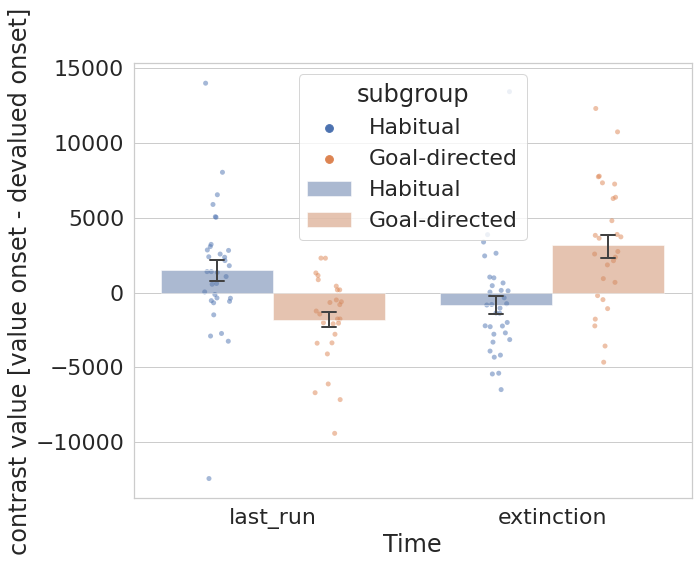

In [33]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(10,8))
sns.stripplot(x="time", y="cope_avg", hue='subgroup', data=df_extinctionvs_last_training_copes, ax=axs, zorder=2, alpha= 0.5,dodge=True, label='_Hidden')
sns.barplot(x="time", y="cope_avg", hue='subgroup', data=df_extinctionvs_last_training_copes, ci=68, ax=axs,alpha=0.5, zorder=2, capsize=0.05, errwidth=2)
#sns.boxplot(x="time", y="cope_avg", data=df_extinctionvs_last_training_copes, ax=axs, zorder=2)
axs.set(xlabel='Time', ylabel='contrast value [value onset - devalued onset]')


## work on cluster 3 - superior parietal lobule:

In [161]:
# create specific clusters mask:
cope_path = '/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat'
all_clusters_mask = os.path.join(cope_path, 'cluster_mask_zstat2.nii.gz')
specific_clusters_mask = os.path.join(cope_path, 'cluster_mask_superior_parietal.nii.gz')

os.system(f'fslmaths -dt int \
    {all_clusters_mask} \
    -thr 3 -uthr 3 -bin \
    {specific_clusters_mask}')





0

In [162]:
# get average contrast values:
clustered_data['avgContrastValues'] = getClusterMeansFMRI(f"{os.path.join(cope_path,'filtered_func_data.nii.gz')}",
                                     f'{specific_clusters_mask}')


fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/filtered_func_data.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_superior_parietal.nii.gz -M


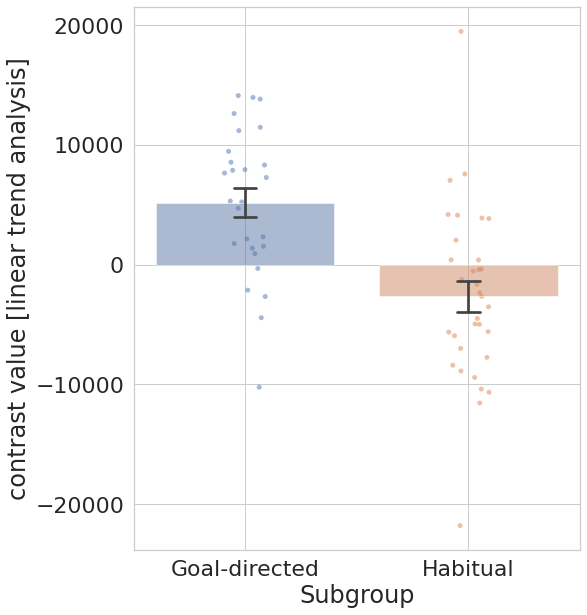

In [163]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(8,10))
sns.stripplot(x="Cluster", y="avgContrastValues", data=clustered_data, ax=axs, zorder=2, alpha= 0.5)
sns.barplot(x="Cluster", y="avgContrastValues", data=clustered_data, ci=68, ax=axs,alpha=0.5, zorder=2, capsize=0.1)
axs.set(xlabel='Subgroup', ylabel='contrast value [linear trend analysis]')
axs.xaxis.grid()



### Now comparing each runseperately:

In [ ]:

# create files for each run for each subgroup of task onset vs. rest onset
ses=1
run=2
cluster = 'Habitual'  
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-training_run-0{run}.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_last_run {' '.join(filesToMerge)}")
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-extinction.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_extinction {' '.join(filesToMerge)}")

cluster = 'Goal-directed'
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-training_run-0{run}.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_last_run {' '.join(filesToMerge)}")
filesToMerge = [f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-{sub}/ses-{ses}/models/model002/sub-{sub}_ses-{ses}_task-extinction.feat/stats/cope9.nii.gz' for sub in clustered_data[clustered_data.Cluster == cluster].ID]
os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_extinction {' '.join(filesToMerge)}")



0

In [164]:
# get average contrast values:

#create empty df:
df_extinctionvs_last_training_copes = pd.DataFrame(columns=['subgroup', 'time', 'cope_avg'])

for cluster in ['Habitual', 'Goal-directed']:
        extinctionvs_last_training_copes = getClusterMeansFMRI(f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_last_run', specific_clusters_mask)
        tempDF = pd.DataFrame([[cluster for i in range(len(extinctionvs_last_training_copes))], ['last_run' for i in range(len(extinctionvs_last_training_copes))],extinctionvs_last_training_copes]).T
        tempDF.columns = ['subgroup', 'time', 'cope_avg']
        #concatenate df:
        df_extinctionvs_last_training_copes = pd.concat([df_extinctionvs_last_training_copes, tempDF])

        extinctionvs_last_training_copes = getClusterMeansFMRI(f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_{cluster}_extinction_vs_last_training_extinction', specific_clusters_mask)
        tempDF = pd.DataFrame([[cluster for i in range(len(extinctionvs_last_training_copes))], ['extinction' for i in range(len(extinctionvs_last_training_copes))],extinctionvs_last_training_copes]).T
        tempDF.columns = ['subgroup', 'time', 'cope_avg']
        #concatenate df:
        df_extinctionvs_last_training_copes = pd.concat([df_extinctionvs_last_training_copes, tempDF])


fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_Habitual_extinction_vs_last_training_last_run -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_superior_parietal.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_Habitual_extinction_vs_last_training_extinction -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model002/onsets_analysis/short_SubGroups_extinction_vs_last_run/equal_var_assumed/short_SubGroups_extinction_vs_last_run-onsets_analysis-whole_brain.gfeat/cope3.feat/cluster_mask_superior_parietal.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/SubGroups/SHORT_Goal-directed_extinction_vs_last_training_last_run -k /export2/DATA/HIS/HIS_server/ana

[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'contrast value [value onset - devalued onset]')]

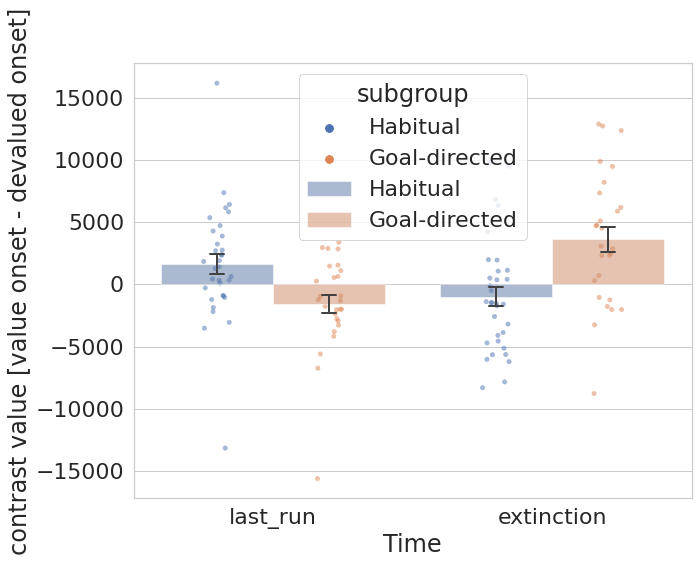

In [165]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(10,8))
sns.stripplot(x="time", y="cope_avg", hue='subgroup', data=df_extinctionvs_last_training_copes, ax=axs, zorder=2, alpha= 0.5,dodge=True, label='_Hidden')
sns.barplot(x="time", y="cope_avg", hue='subgroup', data=df_extinctionvs_last_training_copes, ci=68, ax=axs,alpha=0.5, zorder=2, capsize=0.05, errwidth=2)
#sns.boxplot(x="time", y="cope_avg", data=df_extinctionvs_last_training_copes, ax=axs, zorder=2)
axs.set(xlabel='Time', ylabel='contrast value [value onset - devalued onset]')


*********************

# Secondary parallel whole blocks analysis

# Whole block - Linear trend analyses

In [4]:
# get the subjects that appear in the design file:
subjectsInDesign = []
with open('/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model003/whole-blocks_analysis/linear_trend_across_3_days/linear_trend_across_3_days-whole-blocks_analysis-whole_brain.gfeat/cope1.feat/design.fsf', 'r') as file:
    for line in file:
        if 'sub-' in line:
            subjectsInDesign.append(int(line.split('sub-')[1][:3]))

len(subjectsInDesign)


61

In [ ]:
# get the subjects that appear in the design file:
subjectsInDesign = []
with open('/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model003/whole-blocks_analysis/linear_trend_across_3_days/linear_trend_across_3_days-whole-blocks_analysis-whole_brain.gfeat/cope1.feat/design.fsf', 'r') as file:
    for line in file:
        if 'sub-' in line:
            subjectsInDesign.append(int(line.split('sub-')[1][:3]))

len(subjectsInDesign)


61

In [ ]:
# get the subjects that appear in the design file:
subjectsInDesign = []
with open('/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model003/whole-blocks_analysis/linear_trend_across_3_days/linear_trend_across_3_days-whole-blocks_analysis-whole_brain.gfeat/cope1.feat/design.fsf', 'r') as file:
    for line in file:
        if 'sub-' in line:
            subjectsInDesign.append(int(line.split('sub-')[1][:3]))

len(subjectsInDesign)


61

In [ ]:
# get the subjects that appear in the design file:
subjectsInDesign = []
with open('/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model003/whole-blocks_analysis/linear_trend_across_3_days/linear_trend_across_3_days-whole-blocks_analysis-whole_brain.gfeat/cope1.feat/design.fsf', 'r') as file:
    for line in file:
        if 'sub-' in line:
            subjectsInDesign.append(int(line.split('sub-')[1][:3]))

len(subjectsInDesign)


61

In [ ]:
# get the subjects that appear in the design file:
subjectsInDesign = []
with open('/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model003/whole-blocks_analysis/linear_trend_across_3_days/linear_trend_across_3_days-whole-blocks_analysis-whole_brain.gfeat/cope1.feat/design.fsf', 'r') as file:
    for line in file:
        if 'sub-' in line:
            subjectsInDesign.append(int(line.split('sub-')[1][:3]))

len(subjectsInDesign)


61

In [5]:
# Get the behavioral index:
# ----------------------------------
behav_long = pd.read_csv(os.path.join(behav_data_path, 'habitIndex_LONG.csv'))
# remove subjects that don't have DTI data
absent_from_fMRI_data = [sub for sub in behav_long.subID if sub not in subjectsInDesign]
behav_long = behav_long[~behav_long.subID.isin(absent_from_fMRI_data)]
# now make sure that subject lists are matching:
if not [sub for sub in behav_long.subID] == subjectsInDesign:
    raise Exception('Subject lists are not matching')


In [6]:
# get average contrast values:
behav_long['avgContrastValues'] = getClusterMeansFMRI('/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model003/whole-blocks_analysis/linear_trend_across_3_days/linear_trend_across_3_days-whole-blocks_analysis-whole_brain.gfeat/cope1.feat/filtered_func_data.nii.gz',
                                     '/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model003/whole-blocks_analysis/linear_trend_across_3_days/linear_trend_across_3_days-whole-blocks_analysis-whole_brain.gfeat/cope1.feat/cluster_mask_zstat4.nii.gz')


fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model003/whole-blocks_analysis/linear_trend_across_3_days/linear_trend_across_3_days-whole-blocks_analysis-whole_brain.gfeat/cope1.feat/filtered_func_data.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model003/whole-blocks_analysis/linear_trend_across_3_days/linear_trend_across_3_days-whole-blocks_analysis-whole_brain.gfeat/cope1.feat/cluster_mask_zstat4.nii.gz -M


/export/home/shirangera/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


[Text(26.200000000000017, 0.5, 'Habit index'),
 Text(0.5, 26.200000000000003, 'Contrast value')]

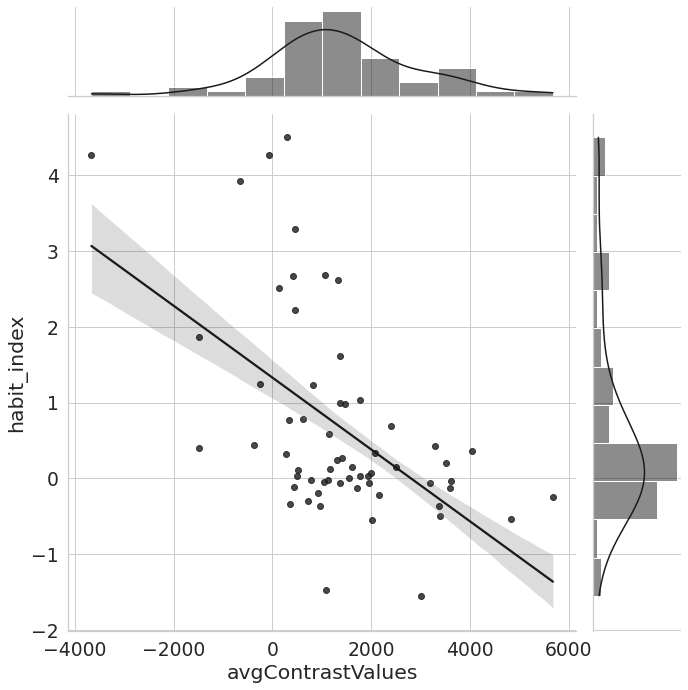

In [9]:
std_for_outliers = 9999999999999
behav_long_no_outiers = behav_long[(behav_long['avgContrastValues'] > (np.mean(behav_long['avgContrastValues']) - std_for_outliers*np.std(behav_long['avgContrastValues']))) & (behav_long['avgContrastValues'] < (np.mean(behav_long['avgContrastValues']) + std_for_outliers*np.std(behav_long['avgContrastValues'])))]

sns.set(font_scale = 1.7)
sns.set_style("whitegrid")
#fig, axs = plt.subplots(ncols=1,figsize=(10,8))
# sns.regplot(x="avgContrastValues", y="habit_index", data=behav_long_no_outiers, ci=68, ax=axs);
sns.jointplot(data=behav_long, x="avgContrastValues", y="habit_index", kind="reg", color="k", size=10, ci=68, ax=axs)
axs.set(ylabel='Habit index', xlabel='Contrast value')




### add each run seperately
based on the way used in main analysis in the putamen above.

In [8]:
# # RUN ONCE: * before running this I changed temproarily participant 251's Feat path to not be included.
# # create contrast per run:
# for ses in range(1,4):
#     for run in range(1,5):
#         os.system(f"fslmerge -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/whole_blocks/task_vs_rest_ses{ses}_run0{run} \
#             /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/sub-2*/ses-{ses}/models/model003/sub-*_ses-{ses}_task-training_run-0{run}.feat/stats/cope8.nii.gz")

In [10]:
# get average contrast values (following lats two < first two in the putamen):

#create empty df:
df_task_vs_rest_rCuneal_copes = pd.DataFrame(columns=['ses', 'run', 'task_vs_rest_rCuneal_cope'])

for ses in range(1,4):
    for run in range(1,5):
        task_vs_rest_rCuneal_copes = getClusterMeansFMRI(f'/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/whole_blocks/task_vs_rest_ses{ses}_run0{run}.nii.gz',
        '/export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model003/whole-blocks_analysis/linear_trend_across_3_days/linear_trend_across_3_days-whole-blocks_analysis-whole_brain.gfeat/cope1.feat/cluster_mask_zstat4.nii.gz')
        tempDF = pd.DataFrame([['Extensive' for i in range(len(task_vs_rest_rCuneal_copes))], [ses for i in range(len(task_vs_rest_rCuneal_copes))],[run for i in range(len(task_vs_rest_rCuneal_copes))],task_vs_rest_rCuneal_copes]).T
        tempDF.columns = ['group','ses', 'run', 'task_vs_rest_rCuneal_cope']
        #concatenate df:
        df_task_vs_rest_rCuneal_copes = pd.concat([df_task_vs_rest_rCuneal_copes, tempDF])

df_task_vs_rest_rCuneal_copes['abs_run'] = 4*(df_task_vs_rest_rCuneal_copes.ses - 1) + df_task_vs_rest_rCuneal_copes.run

# Add the habit index
df_task_vs_rest_rCuneal_copes.reset_index(drop=True, inplace=True)
df_task_vs_rest_rCuneal_copes['habit_index'] = pd.concat([behav_long.habit_index]*12).reset_index(drop=True)


fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/whole_blocks/task_vs_rest_ses1_run01.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model003/whole-blocks_analysis/linear_trend_across_3_days/linear_trend_across_3_days-whole-blocks_analysis-whole_brain.gfeat/cope1.feat/cluster_mask_zstat4.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/whole_blocks/task_vs_rest_ses1_run02.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model003/whole-blocks_analysis/linear_trend_across_3_days/linear_trend_across_3_days-whole-blocks_analysis-whole_brain.gfeat/cope1.feat/cluster_mask_zstat4.nii.gz -M
fslstats -t /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/post_fsl/whole_blocks/task_vs_rest_ses1_run03.nii.gz -k /export2/DATA/HIS/HIS_server/analysis/task_fMRI_data/group_level/model003/whole-blocks_analysis/linear_trend_across_3_days/linear_trend_across_3_days-whole-blocks_analysis-who

Text(0.795, 0.05, 'Day 3')

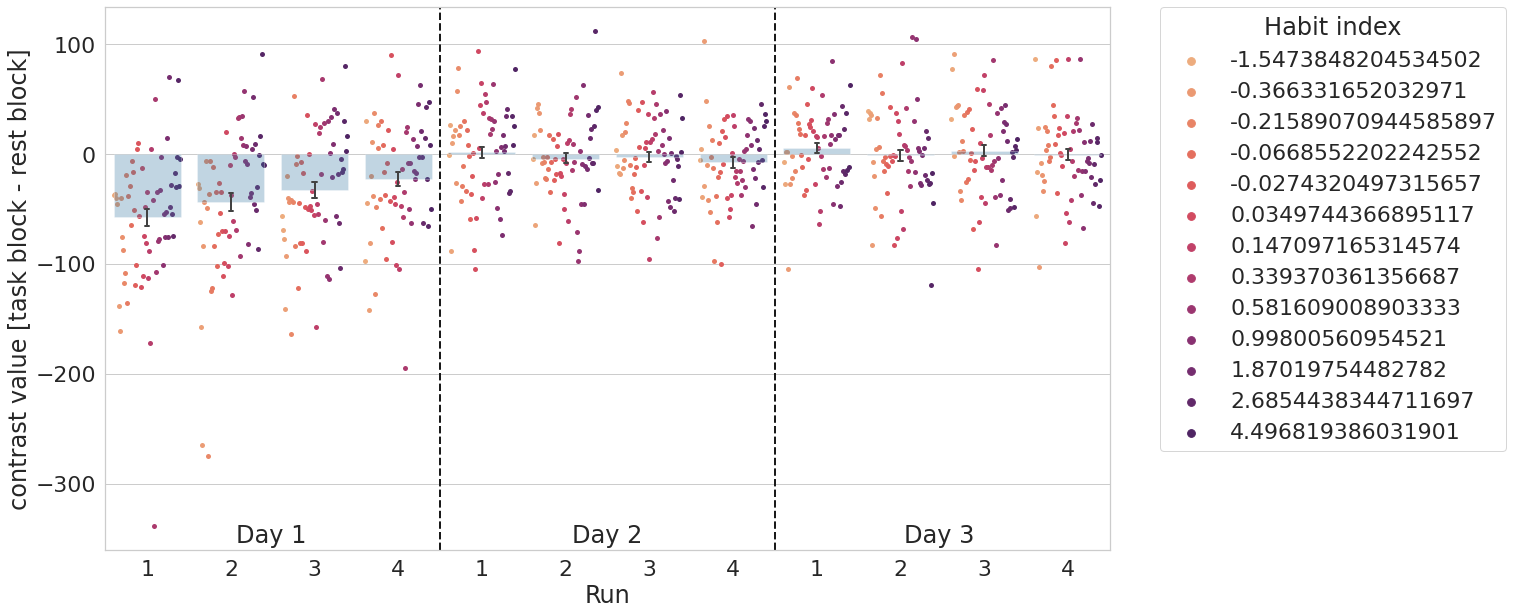

In [66]:
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=1,figsize=(18,10))
sns.stripplot(x="abs_run", y="task_vs_rest_rCuneal_cope", hue='habit_index', data=df_task_vs_rest_rCuneal_copes, ax=axs, zorder=2,dodge=True, palette="flare")
#sns.scatterplot(x="abs_run", y="task_vs_rest_rCuneal_cope", size='habit_index', data=df_task_vs_rest_rCuneal_copes, ax=axs, zorder=2)
sns.barplot(x="abs_run", y="task_vs_rest_rCuneal_cope", color="#1f77b4", data=df_task_vs_rest_rCuneal_copes, ci=68, ax=axs,alpha=0.3, zorder=2, capsize=0.05, errwidth=2)
#sns.boxplot(x="abs_run", y="task_vs_rest_rCuneal_cope", data=df_task_vs_rest_rCuneal_copes, ax=axs, zorder=2)
axs.set(xlabel='Run', ylabel='contrast value [task block - rest block]')
axs.set_xticklabels(['1', '2', '3', '4'] * 3)
axs.axvline(x=3.5, linewidth=2, color='k', zorder=1, linestyle='--')
axs.axvline(x=7.5, linewidth=2, color='k', zorder=1, linestyle='--')
#axs.xaxis.grid()
h,l = axs.get_legend_handles_labels()
axs.legend(h[::5],l[::5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Habit index')

axs.text(0.13, 0.05, "Day 1", ha="left", va="top", transform=axs.transAxes)
axs.text(0.465, 0.05, "Day 2", ha="left", va="top", transform=axs.transAxes)
axs.text(0.795, 0.05, "Day 3", ha="left", va="top", transform=axs.transAxes)
